<b>C1. Qualifier les données grâce à des outils d’analyse et de visualisation de données en vue de vérifier leur adéquation avec le projet.</b>

In [ ]:
%pip install pandas matplotlib


========== Movies DataFrame Head ==========

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

========== Ratings DataFrame Head ==========

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

========== Movies DataFrame Info ==========

<class 'pandas.core.frame.DataFrame'>


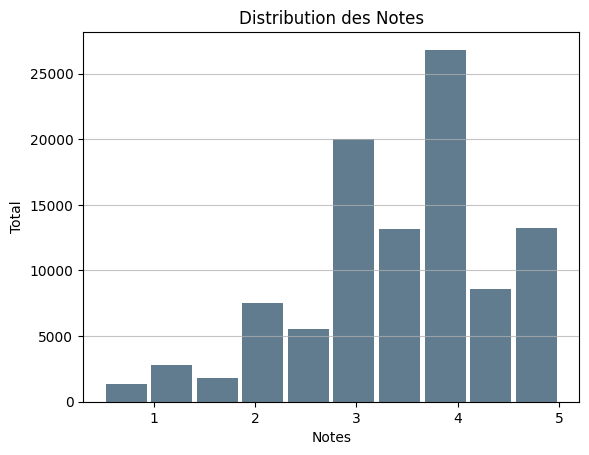

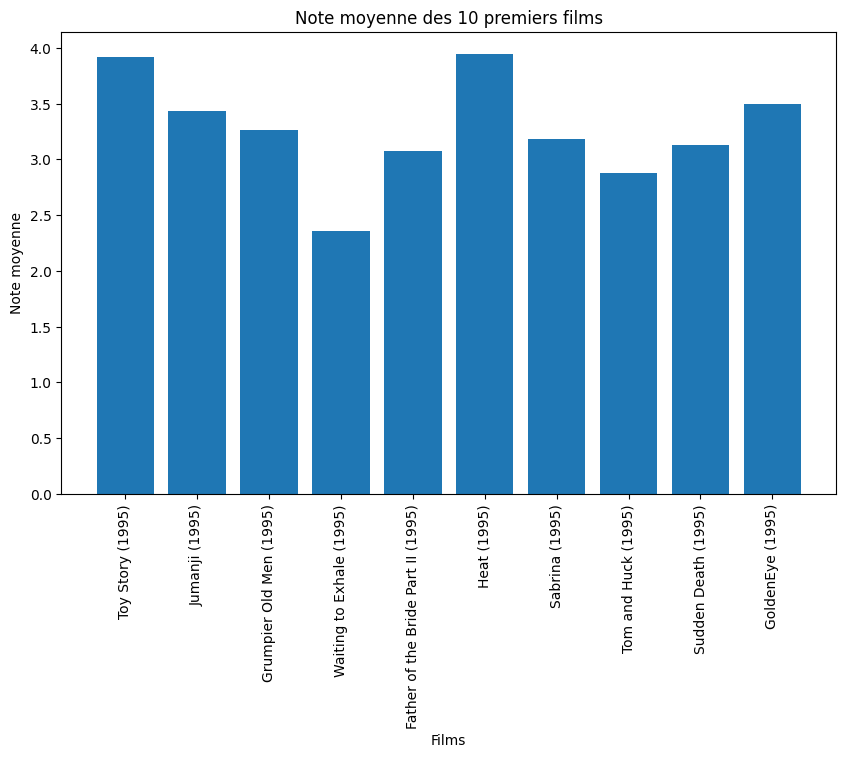


========== Check des valeurs manquantes ==========

movieId    0
title      0
genres     0
dtype: int64
userId     0
movieId    0
rating     0
dtype: int64


In [54]:
# Importation des librairies necessaires a leurs analyses et visualisation
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des datas avec Pandas
movies = pd.read_csv('../data/movies.csv')
ratings = pd.read_csv('../data/ratings.csv')



# Print les premieres lignes de chaque DataFrames 
print("\n========== Movies DataFrame Head ==========\n")
print(movies.head())
print("\n========== Ratings DataFrame Head ==========\n")
print(ratings.head())

# Avoir les informations basiques de chaque DataFrames
print("\n========== Movies DataFrame Info ==========\n")
print(movies.info())
print("\n========== Ratings DataFrame Info ==========\n")
print(ratings.info())

# Analyse Statistique du DataFrame Rating
print("\n========== Ratings Statistics ==========\n")
print(ratings.describe())

# Data cleaning
print("\n========== Data types ==========\n")
print(movies.dtypes)
print(ratings.dtypes)
print("\n========== Somme des valeurs en double ==========\n")
print(movies.duplicated().sum())
print(ratings.duplicated().sum())

# Nombre de films uniques
print("\n========== Unique Movies ==========\n")
print(movies['movieId'].nunique())

# Note moyenne
print("\n========== Average Rating ==========\n")
print(ratings['rating'].mean())

# Suppression colomne inutile (run once)
ratings.drop('timestamp', axis=1, inplace=True)

# Visualisation de la colonne 'rating' du DataFrame 'Ratings' avec Seaborn
ratings['rating'].hist(bins=10, grid=False, rwidth=0.9, color='#607c8e')
plt.title('Distribution des Notes')
plt.xlabel('Notes')
plt.ylabel('Total')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 10 premiers films
first_10_movies = movies.head(10)

# Note moyenne par film
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()

# Note moyenne des 10 premiers films
first_10_ratings = pd.merge(first_10_movies, average_ratings, on='movieId')

# Visualisation des 10 premiers films
plt.figure(figsize=(10, 6))
plt.bar(first_10_ratings['title'], first_10_ratings['rating'])
plt.xlabel('Films')
plt.ylabel('Note moyenne')
plt.title('Note moyenne des 10 premiers films')
plt.xticks(rotation=90)
plt.show()

# Check de valeurs manquantes dans les deux DataSets
print("\n========== Check des valeurs manquantes ==========\n")
print(movies.isnull().sum())
print(ratings.isnull().sum())